# Assignment 02

In [75]:
import pandas as pd
import numpy as np

## loading dataset

In [76]:
datafile_path = './iris.data'
title = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_dataset = pd.read_csv(datafile_path,names=title)
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## a. Random divide the dataset as development and test. 80% as develop data and 20% as test data

In [77]:
# Hierarchical division
# class1_data = iris_dataset.iloc[:50]
# class2_data = iris_dataset.iloc[50:100]
# class3_data = iris_dataset.iloc[100:150]

# develop_data = pd.concat( [class1_data[:40],class2_data[:40],class3_data[:40]], axis=0 )
# test_data = pd.concat( [class1_data[40:50],class2_data[40:50],class3_data[40:50]], axis=0 )
# develop_data

# Random division
boolean_list = np.random.rand(len(iris_dataset)) < 0.8
develop_data = iris_dataset[boolean_list]
test_data  = iris_dataset[~boolean_list]
print(len(develop_data),len(test_data))

118 32


In [78]:
develop_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
142,5.8,2.7,5.1,1.9,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica


In [79]:
test_data

,sepal_length,sepal_width,petal_length,petal_width,class
1,4.9,3.0,1.4,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa


## b.Implement kNN

In [80]:
from math import pow, sqrt

def euclidean_distance(data1, data2):
    distance = []
    for i in range(len(data1) - 1):
        value = pow(data1[i] - data2[i], 2)
        distance.append(value)
    return sqrt(sum(distance))

euclidean_distance(test_data.iloc[0],test_data.iloc[1])

0.5099019513592785

In [81]:
def normalized_euclidean_distance(data1, data2):
    data1_sum = 0
    data2_sum = 0
    for i in range(len(data1) - 1):
        data1_sum += data1[i]
        data2_sum += data2[i]
    
    data1_mean = data1_sum/len(data1)
    data2_mean = data2_sum/len(data2)
    
    numerator_square = 0
    data1_square = 0
    data2_square = 0
    for i in range(len(data1) - 1):
        numerator_square += pow((data1[i] - data1_mean) - (data2[i] - data2_mean),2)
        data1_square += pow(data1[i] - data1_mean, 2)
        data2_square += pow(data2[i] - data2_mean, 2)
    return 0.5 * sqrt(numerator_square) / (sqrt(data1_square)+ sqrt(data2_square))

normalized_euclidean_distance(test_data.iloc[0],test_data.iloc[1])

0.030044451366651233

In [82]:
def cosine_similarity(data1, data2):
    numerator = 0
    data1_square = 0
    data2_square = 0
    for i in range(len(data1) - 1):
        numerator += data1[i] * data2[i]
        data1_square += pow(data1[i], 2 )
        data2_square += pow(data2[i], 2 )
    return numerator/ (sqrt(data1_square) * sqrt(data2_square))

cosine_similarity(test_data.iloc[0],test_data.iloc[1])

0.99926089097567

In [83]:
def get_neighbors(dataset, target, number, distance_method):
    distance_list = list()
    if distance_method == 'euclidean_distance':
        method = euclidean_distance
    elif distance_method == 'normalized_euclidean_distance':
        method = normalized_euclidean_distance
    else:
        method = cosine_similarity
    for index, dataset_item in dataset.iterrows():
        distance = method(target, dataset_item)
        distance_list.append((distance, dataset_item))
    
    distance_list.sort(key=lambda tup: tup[0])
    if(distance_method == 'cosine_similarity'):
        distance_list.reverse()
    neighbors_list = list()
    for i in range(number):
        neighbors_list.append(distance_list[i][1])
    return neighbors_list

get_neighbors(develop_data, test_data.iloc[0], 5, 'cosine_similarity')

[sepal_length            4.8
 sepal_width               3
 petal_length            1.4
 petal_width             0.1
 class           Iris-setosa
 Name: 12, dtype: object,
 sepal_length            4.8
 sepal_width               3
 petal_length            1.4
 petal_width             0.3
 class           Iris-setosa
 Name: 45, dtype: object,
 sepal_length            5.4
 sepal_width             3.4
 petal_length            1.7
 petal_width             0.2
 class           Iris-setosa
 Name: 20, dtype: object,
 sepal_length            4.9
 sepal_width             3.1
 petal_length            1.5
 petal_width             0.1
 class           Iris-setosa
 Name: 34, dtype: object,
 sepal_length              5
 sepal_width               3
 petal_length            1.6
 petal_width             0.2
 class           Iris-setosa
 Name: 25, dtype: object]

In [84]:
def predict(dataset, target, number, distance_method):
    neighbors_list = get_neighbors(dataset, target, number, distance_method)
    output_values = [row.values[-1] for row in neighbors_list]
    prediction_class = max(set(output_values), key=output_values.count)
    return prediction_class

predict(develop_data, test_data.iloc[0], 5, 'cosine_similarity')

'Iris-setosa'

## c.Using the development dataset, find optimal hyperparameters

In [91]:
def calculate_accuracy(dataset, develop_dataset, number, distance_method):
    predictions = []
    count = 0
    for index, dataset_item in dataset.iterrows():
        label = predict(develop_dataset, dataset_item, number, distance_method)
        predictions.append(label)
    for i in range(len(predictions)):
        if dataset.iloc[i][-1] == predictions[i]:
            count += 1
    return count/len(predictions)
calculate_accuracy(develop_data, develop_data, 3, 'cosine_similarity')

0.9830508474576272

In [86]:
numbers = [1, 3 ,5, 7]
distance_methods = ['euclidean_distance', 'normalized_euclidean_distance', 'cosine_similarity']

predict_result = []
for method in distance_methods:
    inner =[]
    for number in numbers:
        accuracy = calculate_accuracy(develop_data, develop_data, number, method)
        inner.append(accuracy)
    predict_result.append(inner)
predict_result

[[1.0, 0.9491525423728814, 0.9661016949152542, 0.9661016949152542],
 [1.0, 0.9830508474576272, 0.9745762711864406, 0.9830508474576272],
 [1.0, 0.9830508474576272, 0.9745762711864406, 0.9745762711864406]]

### Draw bar charts for accuracy

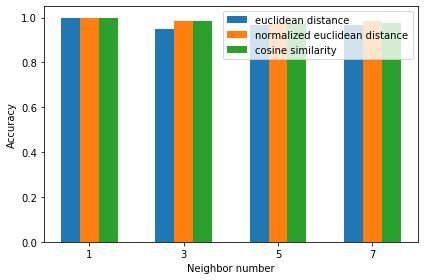

In [87]:
import matplotlib.pyplot as plt

x = np.arange(len(numbers))  
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, predict_result[0], width, label='euclidean distance')
rects2 = ax.bar(x, predict_result[1], width, label='normalized euclidean distance')
rects3 = ax.bar(x + width, predict_result[2], width, label='cosine similarity')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Neighbor number')
ax.set_xticks(x)
ax.set_xticklabels(numbers)
ax.legend()

fig.tight_layout()
plt.show()

## d.Using the test dataset

In the step c, we can discover when neighbor number is 1, the accuracy is largest. So I choose neighbor number is 1 and cosine similarity as the optimal hyperparameters.

In [90]:
print('final accuracy:')
calculate_accuracy(test_data, develop_data, 1, 'cosine_similarity')

final accuracy:


0.96875